# Import

In [1]:
import sys
sys.path.append("../src")

from utils import *
from mitigation_fct import *
from distance import *
from Gems_Wasserstein import *

In [5]:
import pandas as pd
import torch
import torch.nn as nn
import schedulefree
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from pandas.api.types import is_string_dtype

In [3]:
df_base = pd.read_csv('../Data/BAF/Base.csv')
df_1    = pd.read_csv('../Data/BAF/Variant I.csv')
df_2    = pd.read_csv('../Data/BAF/Variant II.csv')
df_3    = pd.read_csv('../Data/BAF/Variant III.csv')
df_4    = pd.read_csv('../Data/BAF/Variant IV.csv')
df_5    = pd.read_csv('../Data/BAF/Variant V.csv')

## Exploration & Variable Selection

In [4]:
df_all = pd.DataFrame({})
for i, dfs in enumerate([df_base, df_1, df_2, df_3, df_4, df_5]):
    dfs['id'] = i
    df_all = pd.concat([df_all, dfs])

In [5]:
for threshold in np.arange(0.1,0.9,0.1):
    print(threshold, df_base[df_base.income <= threshold].fraud_bool.mean() / df_base[df_base.income > threshold].fraud_bool.mean())

0.1 0.48066185971455916
0.2 0.4743142495116224
0.30000000000000004 0.46920959043315286
0.4 0.46584032483175025
0.5 0.463093534462972
0.6 0.463093534462972
0.7000000000000001 0.42237509598988254
0.8 0.3702800240980548


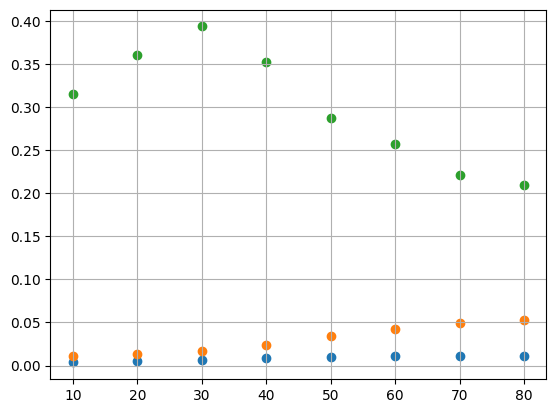

In [6]:
list_P1, list_P0, list_DI = [], [], []
for threshold in np.arange(10,90,10):
    P0, P1 = df_base[df_base.customer_age <= threshold].fraud_bool.mean(), df_base[df_base.customer_age > threshold].fraud_bool.mean()
    DI_value = P0 / P1
    list_P0.append(P0)
    list_P1.append(P1)
    list_DI.append(DI_value)
plt.scatter(np.arange(10,90,10), list_P0, label = 'P1S0')
plt.scatter(np.arange(10,90,10), list_P1, label = 'P1S1')
plt.scatter(np.arange(10,90,10), list_DI, label = 'DI')
plt.grid()
plt.show()

0 0 0 fraud_bool
1 0 1 income


C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_sample[df_sample.fraud_bool == 0], x = column, label = 'clear', ax = ax[j,l], color = 'red')
C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_sample[df_sample.fraud_bool == 1], x = column, hue = 'fraud_bool',label = 'fraud', ax = ax[j,l], color = 'blue')
C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j,l].legend()


2 0 2 name_email_similarity
3 0 3 prev_address_months_count
4 0 4 current_address_months_count
5 0 5 customer_age
6 0 6 intended_balcon_amount
7 1 0 payment_type
the column payment_type is categorical
8 1 1 zip_count_4w
9 1 2 velocity_6h
10 1 3 velocity_24h
11 1 4 velocity_4w
12 1 5 date_of_birth_distinct_emails_4w
13 1 6 employment_status
the column employment_status is categorical
14 2 0 credit_risk_score
15 2 1 email_is_free
16 2 2 housing_status
the column housing_status is categorical
17 2 3 phone_home_valid
18 2 4 phone_mobile_valid
19 2 5 bank_months_count
20 2 6 has_other_cards
21 3 0 proposed_credit_limit
22 3 1 foreign_request
23 3 2 source
the column source is categorical
24 3 3 session_length_in_minutes
25 3 4 device_os
the column device_os is categorical
26 3 5 keep_alive_session
27 3 6 device_distinct_emails_8w
28 4 0 device_fraud_count
29 4 1 month


C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_sample[df_sample.fraud_bool == 0], x = column, label = 'clear', ax = ax[j,l], color = 'red')
C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_sample[df_sample.fraud_bool == 1], x = column, hue = 'fraud_bool',label = 'fraud', ax = ax[j,l], color = 'blue')
C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j,l].legend()


30 4 2 id


C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_sample[df_sample.fraud_bool == 0], x = column, label = 'clear', ax = ax[j,l], color = 'red')
C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_sample[df_sample.fraud_bool == 1], x = column, hue = 'fraud_bool',label = 'fraud', ax = ax[j,l], color = 'blue')
C:\Users\Valentin\AppData\Local\Temp\ipykernel_12684\3994908475.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[j,l].legend()


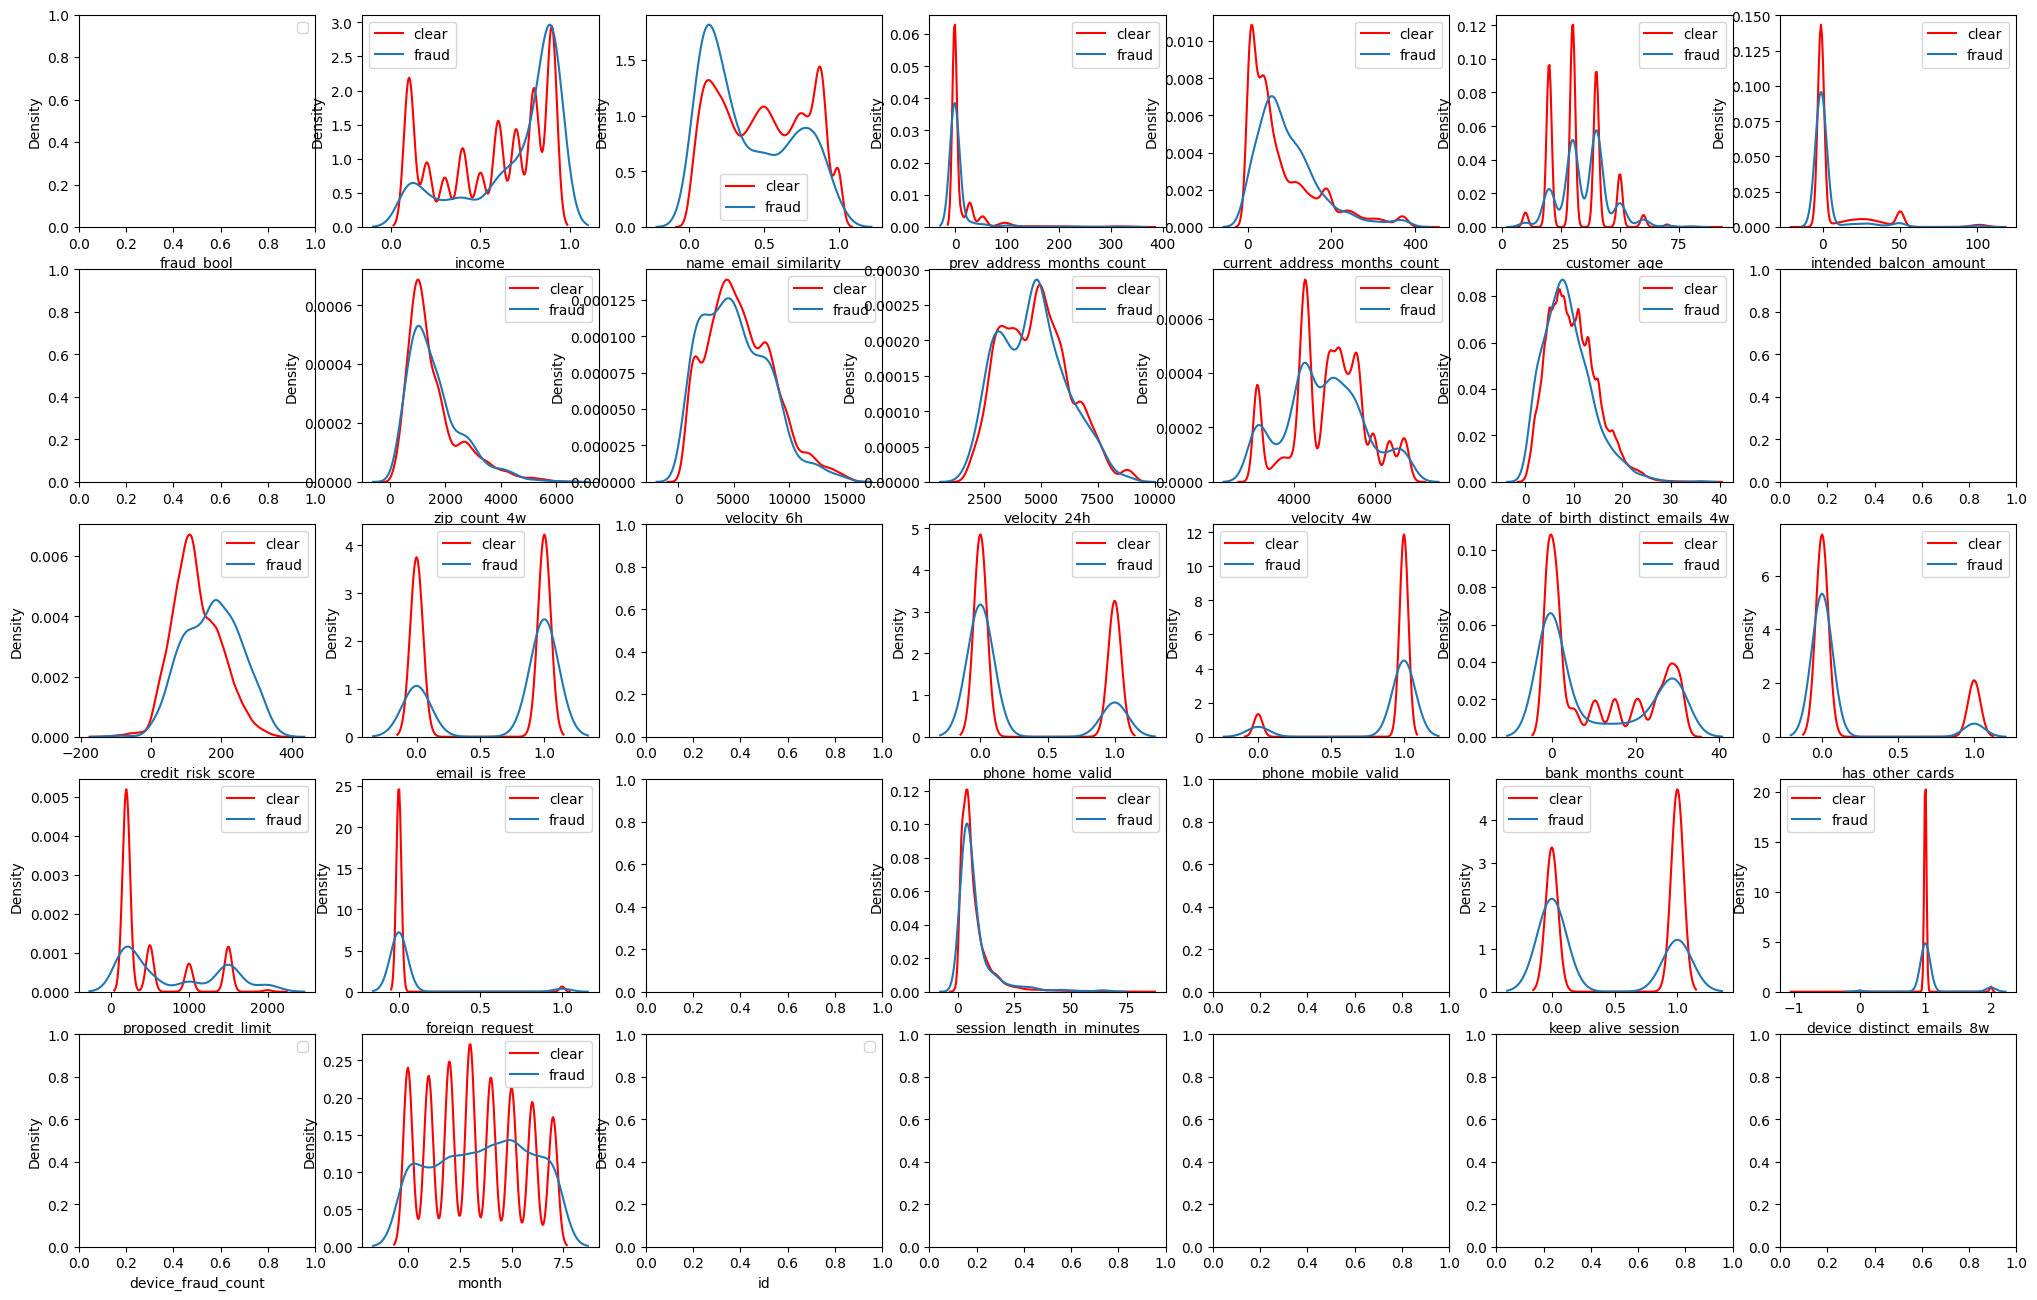

In [14]:
df_sample = df_all[df_all.id == 1].drop(['days_since_request', 'bank_branch_count_8w', 'x1', 'x2'], axis = 1).sample(100000)

fig, ax = plt.subplots(5,7, figsize = (25, 16))
j, l = 0, 0
for i, column in enumerate(df_sample.columns):
    print(i, j, l, column)
    try:
        sns.kdeplot(data = df_sample[df_sample.fraud_bool == 0], x = column, label = 'clear', ax = ax[j,l], color = 'red')
        sns.kdeplot(data = df_sample[df_sample.fraud_bool == 1], x = column, hue = 'fraud_bool',label = 'fraud', ax = ax[j,l], color = 'blue')
        ax[j,l].legend()
    except:
        print(f'the column {column} is categorical')
    l +=1
    if l == 7:
        j +=1
        l = 0

fraud_bool
income
name_email_similarity
prev_address_months_count
current_address_months_count
customer_age
days_since_request
intended_balcon_amount
payment_type
zip_count_4w
velocity_6h
velocity_24h
velocity_4w
bank_branch_count_8w
date_of_birth_distinct_emails_4w
employment_status
credit_risk_score
email_is_free
housing_status
phone_home_valid
phone_mobile_valid
bank_months_count
has_other_cards
proposed_credit_limit
foreign_request
source
session_length_in_minutes
device_os
keep_alive_session
device_distinct_emails_8w
device_fraud_count
month
id
x1
x2


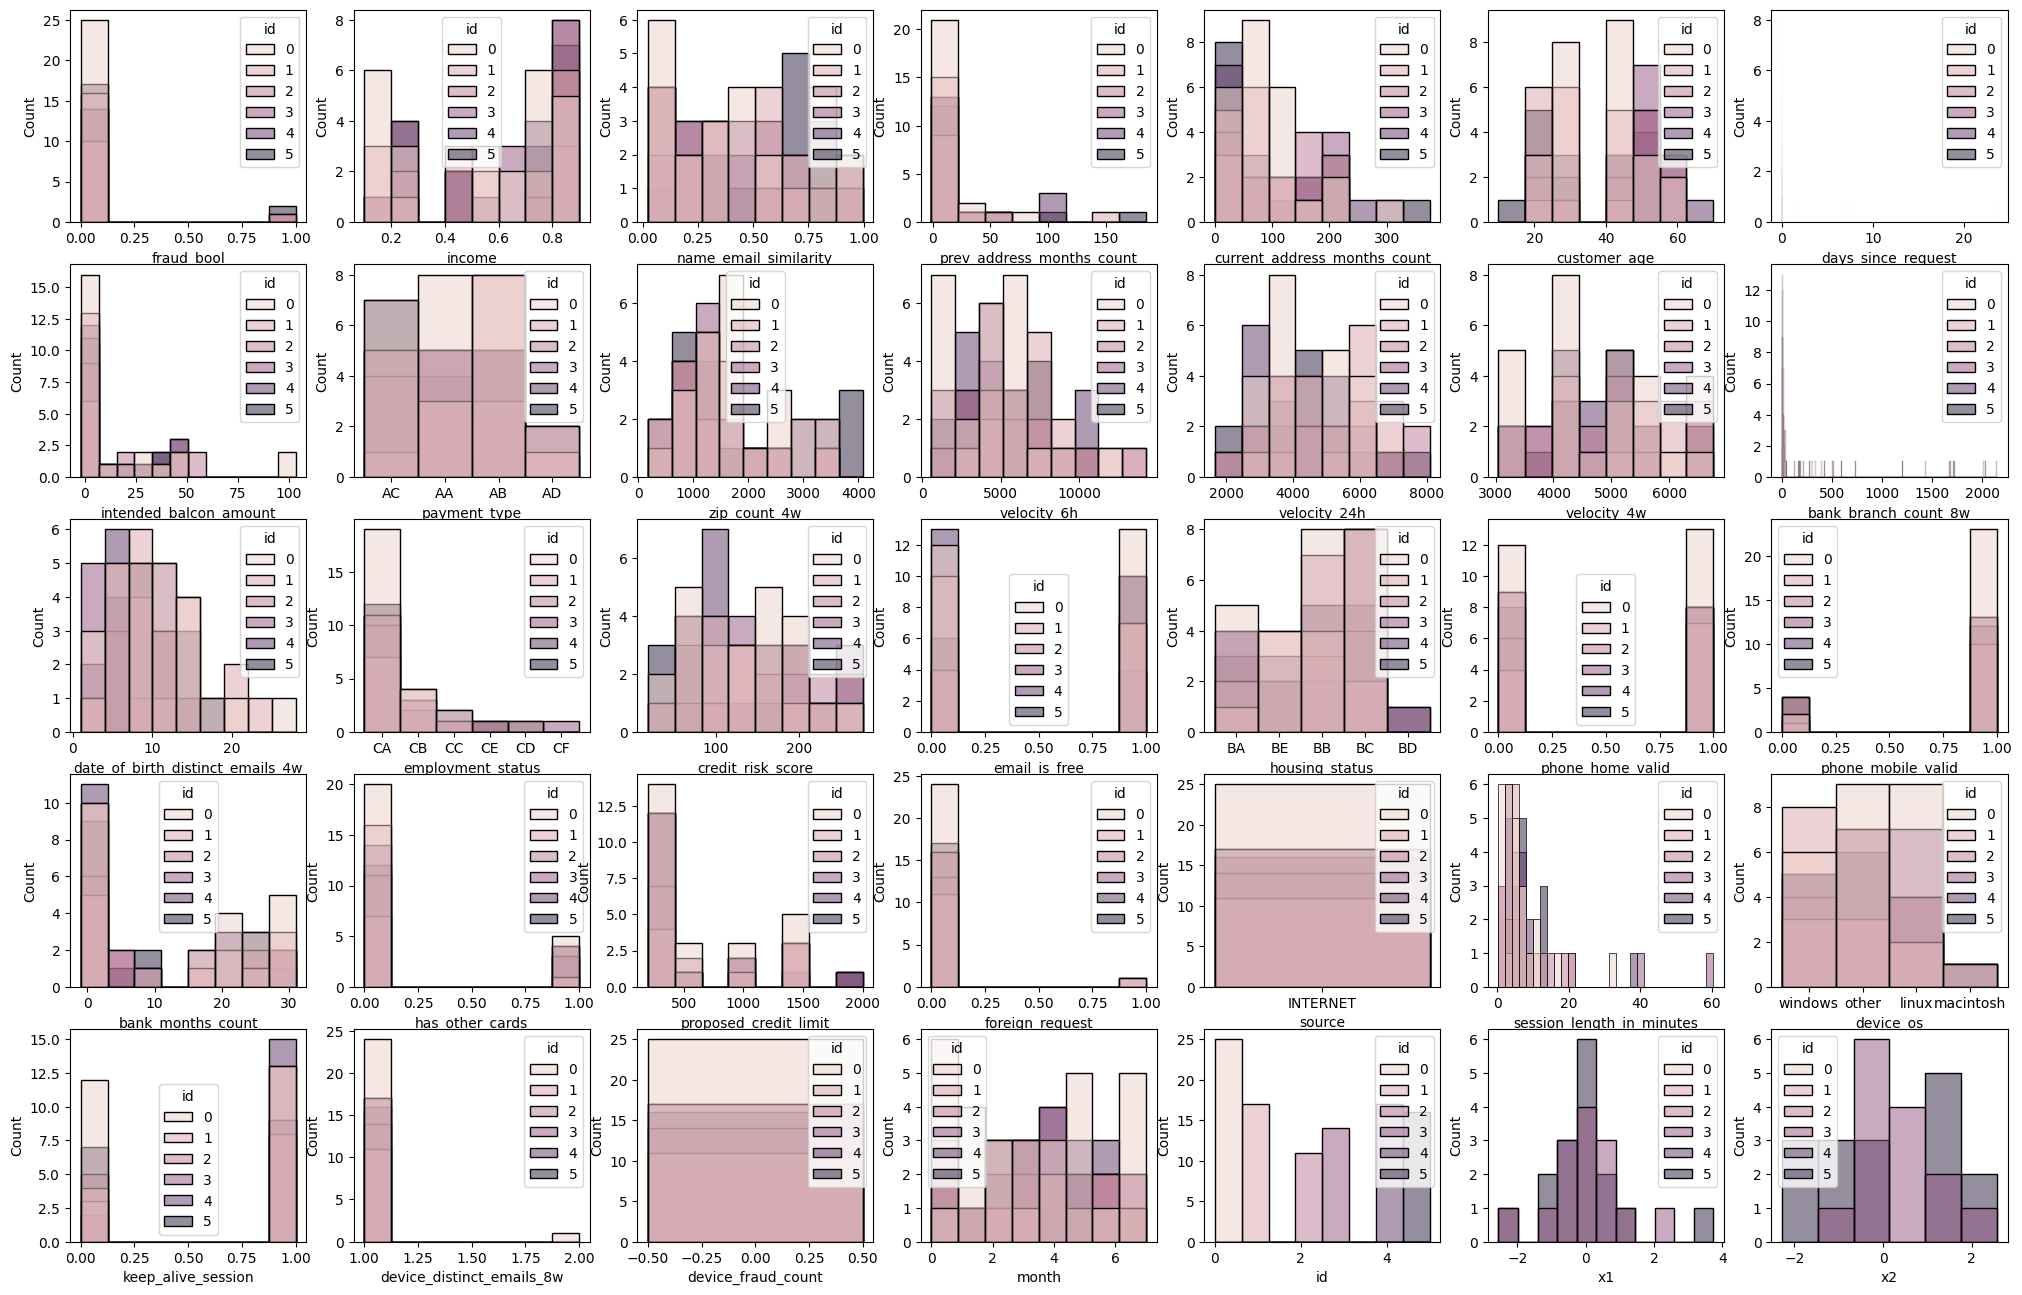

In [6]:
fig, ax = plt.subplots(5,7, figsize = (25, 16))
j, l = 0, 0
for i, column in enumerate(df_all.columns):
    print(column)
    sns.histplot(data = df_sample, x = column, hue = 'id', ax = ax[j,l])
    l +=1
    if l == 7:
        j +=1
        l = 0

In [6]:
col_to_remove = ['days_since_request', 'bank_branch_count_8w', 'intended_balcon_amount', 'date_of_birth_distinct_emails_4w', 'velocity_6h', 'velocity_24h', 'date_of_birth_distinct_emails_4w']
df_base = df_base.drop(col_to_remove, axis = 1)

In [7]:
target_name, S_variable_name_1, S_variable_name_2 = 'fraud_bool', 'income', 'customer_age'

In [14]:
df_base['source'] = df_base['source'] == 'INTERNET'

In [8]:
X_col, dic_col_name_index = [], {}
for index, column in enumerate(df_base.columns):
    if column not in [target_name, S_variable_name_1, S_variable_name_2]:
        X_col.append(column)
    dic_col_name_index[column] = index

In [15]:
for col in X_col:
    if is_string_dtype(df_base[col]):
        print(col)

payment_type
employment_status
housing_status
device_os


In [17]:
df_base_new = pd.get_dummies(df_base, ['payment_type', 'employment_status', 'housing_status', 'device_os'], dtype = int)

In [27]:
df_base_new.std() == 0

fraud_bool                      False
income                          False
name_email_similarity           False
prev_address_months_count       False
current_address_months_count    False
customer_age                    False
zip_count_4w                    False
velocity_4w                     False
credit_risk_score               False
email_is_free                   False
phone_home_valid                False
phone_mobile_valid              False
bank_months_count               False
has_other_cards                 False
proposed_credit_limit           False
foreign_request                 False
source                          False
session_length_in_minutes       False
keep_alive_session              False
device_distinct_emails_8w       False
device_fraud_count               True
month                           False
id                               True
payment_type_AA                 False
payment_type_AB                 False
payment_type_AC                 False
payment_type

In [28]:
col_to_remove = ['device_fraud_count', 'id']
df_base_new = df_base_new.drop(col_to_remove, axis = 1)

## Export

In [29]:
df_base_new.to_csv('../Data/BAF/Base_mod.csv', index = False)